<a href="https://colab.research.google.com/github/caiogiffoni/ia-ml-guide/blob/main/Fuzzy_gorgetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy - exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


## Instalação e importação das bibliotecas

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [ ]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [ ]:
qualidade

Antecedent: qualidade

In [ ]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [ ]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [ ]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

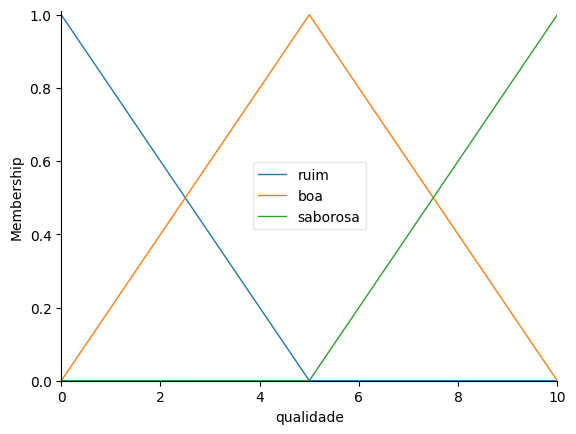

In [ ]:
qualidade.view()

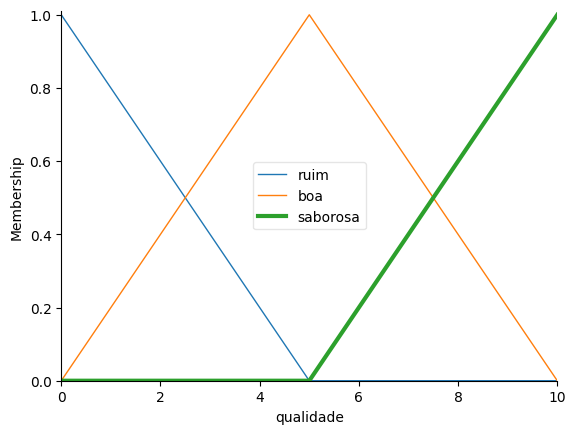

In [ ]:
qualidade['saborosa'].view()

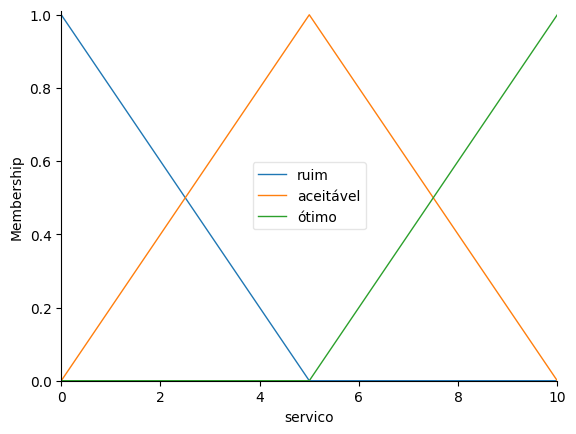

In [ ]:
servico.view()

In [ ]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
# gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
# gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
# gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

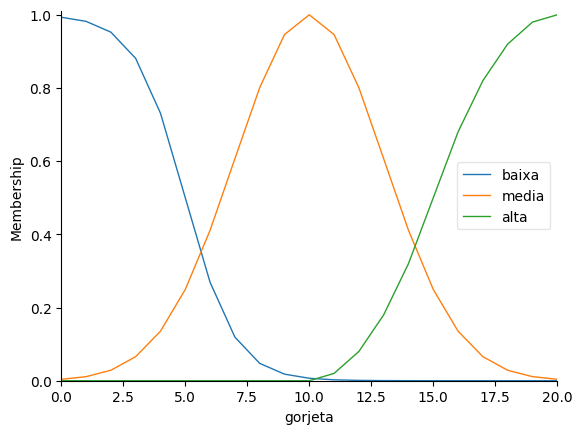

In [ ]:
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 5
sistema.input['servico'] = 7
sistema.compute()

10.000000000000002


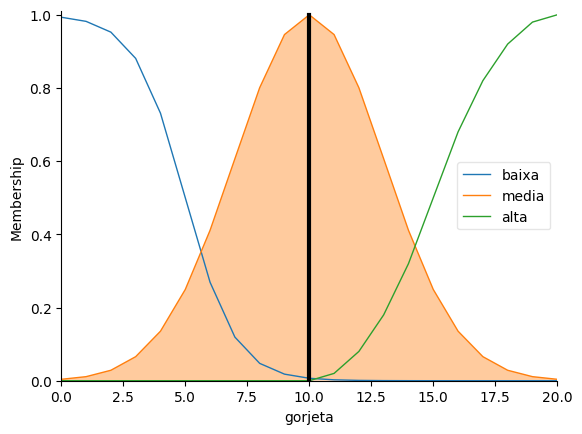

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)